<a href="https://colab.research.google.com/github/Jiyakataria/Rainfall-Prediction/blob/main/Rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
df=pd.read_csv('/content/Rainfall.csv')
print(df)

     day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   \
0      1     1025.9     19.9         18.3     16.8      13.1         72   
1      2     1022.0     21.7         18.9     17.2      15.6         81   
2      3     1019.7     20.3         19.3     18.0      18.4         95   
3      4     1018.9     22.3         20.6     19.1      18.8         90   
4      5     1015.9     21.3         20.7     20.2      19.9         95   
..   ...        ...      ...          ...      ...       ...        ...   
361   27     1022.7     18.8         17.7     16.9      15.0         84   
362   28     1026.6     18.6         17.3     16.3      12.8         75   
363   29     1025.9     18.9         17.7     16.4      13.3         75   
364   30     1025.3     19.2         17.3     15.2      13.3         78   
365   31     1026.4     20.5         17.8     15.5      13.0         74   

     cloud  rainfall  sunshine           winddirection  windspeed  
0        49      yes       9.3 

In [62]:
df.tail()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [63]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [65]:
df.isnull().count()

,0
day,366
pressure,366
maxtemp,366
temparature,366
mintemp,366
dewpoint,366
humidity,366
cloud,366
rainfall,366
sunshine,366


In [66]:
df.isnull()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.columns = df.columns.str.strip()
# Convert 'yes' to 1 and 'no' to 0 for numerical analysis
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

# Fill missing values in 'winddirection' and 'windspeed' columns
# using their mean to avoid dropping rows with single missing values
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mean())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

correlation = df[['temparature','humidity','windspeed','cloud','rainfall']].corr()
display(correlation['rainfall'].sort_values(ascending=False))

,rainfall
rainfall,1.000000
cloud,0.625766
humidity,0.489623
windspeed,0.154389
temparature,-0.037360


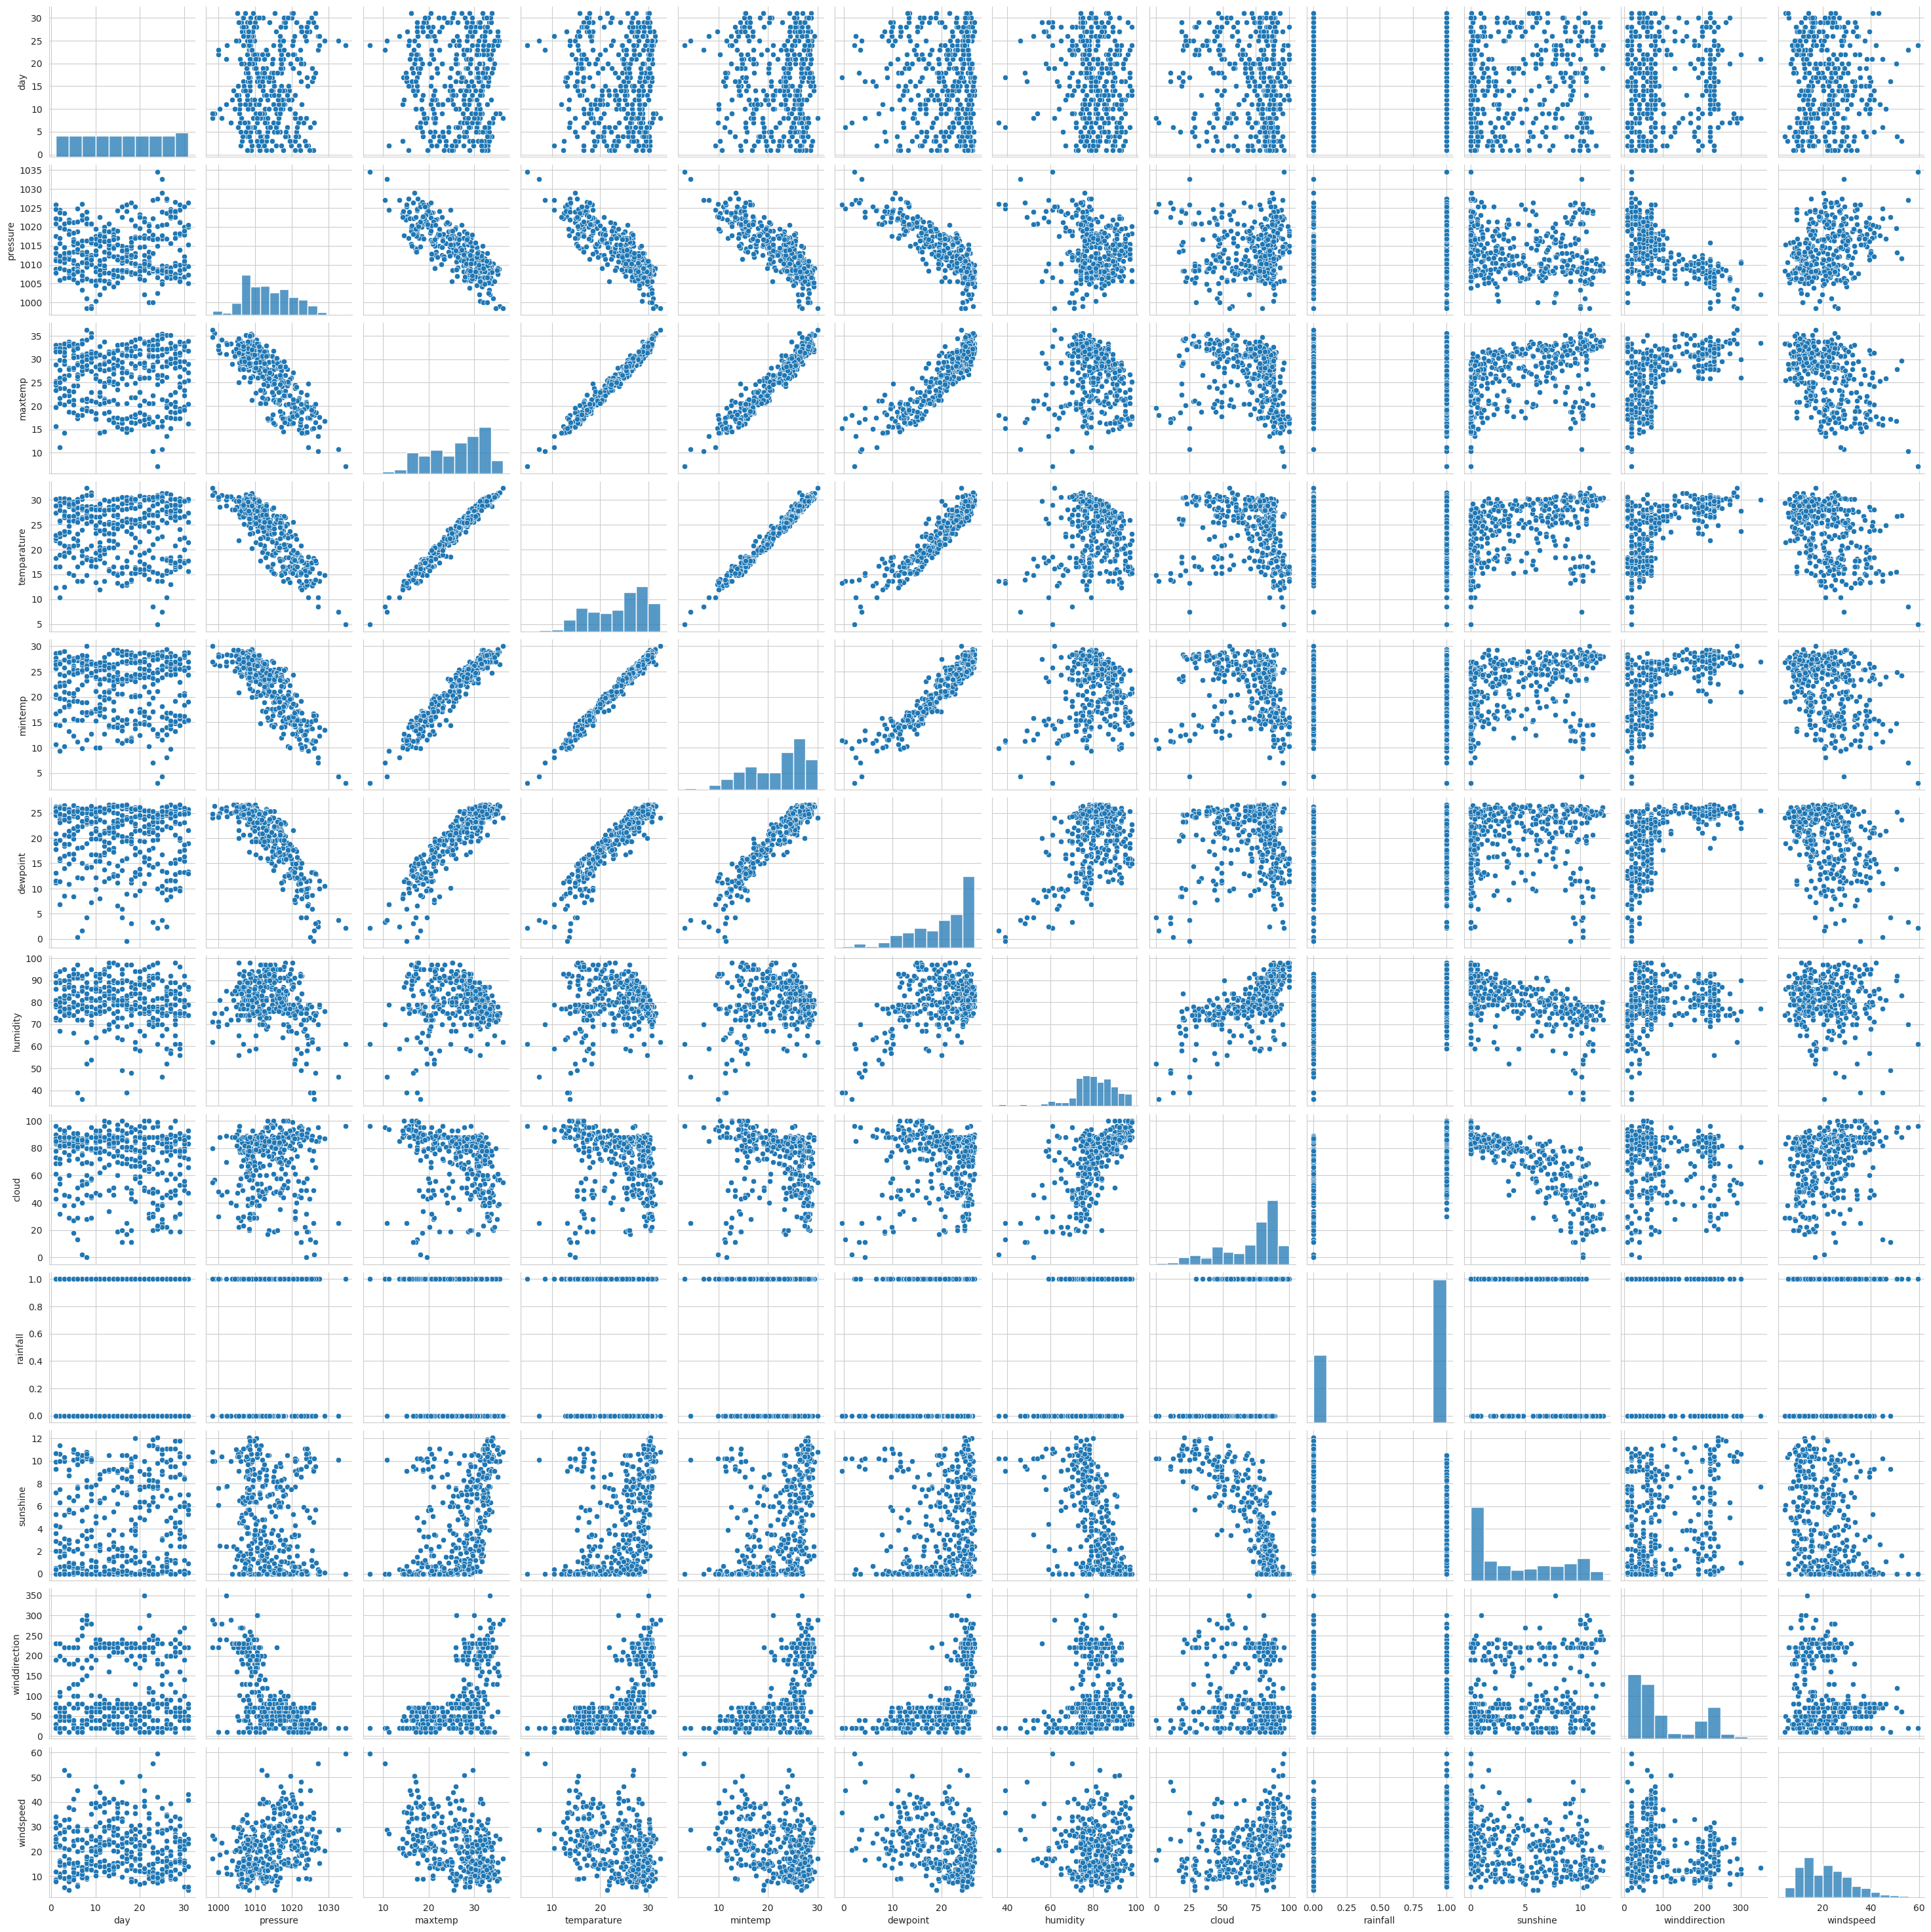

In [68]:
sns.set_style('whitegrid')
sns.pairplot(df)

In [69]:
x=df[['temparature','humidity','windspeed','cloud']]
y=df['rainfall']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
print(x.shape,y.shape)

(366, 4) (366,)


In [72]:
print(df.shape)
print(df.columns)
print(df.head())


(366, 12)
Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')
   day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1025.9     19.9         18.3     16.8      13.1        72     49   
1    2    1022.0     21.7         18.9     17.2      15.6        81     83   
2    3    1019.7     20.3         19.3     18.0      18.4        95     91   
3    4    1018.9     22.3         20.6     19.1      18.8        90     88   
4    5    1015.9     21.3         20.7     20.2      19.9        95     81   

   rainfall  sunshine  winddirection  windspeed  
0         1       9.3           80.0       26.3  
1         1       0.6           50.0       15.3  
2         1       0.0           40.0       14.2  
3         1       1.0           50.0       16.9  
4         1       0.0           40.0       13.7  


In [73]:
import os
os.listdir('/content')


['.config',
 'Rainfall (1).csv',
 'Rainfall.csv',
 'Rainfall (2).csv',
 'sample_data']

In [74]:
!head /content/rainfall.csv



head: cannot open '/content/rainfall.csv' for reading: No such file or directory


In [75]:
from google.colab import files
uploaded = files.upload()


Saving Rainfall.csv to Rainfall (3).csv


In [76]:
import pandas as pd

filename = list(uploaded.keys())[0]   # get uploaded filename
df = pd.read_csv(filename)

print(df.shape)
df.head()


(366, 12)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [77]:
x = df[['temparature','humidity','windspeed','cloud']]
y = df['rainfall']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


KeyError: "['humidity', 'cloud'] not in index"

In [78]:
print(df.columns)


Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')


In [79]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')


In [80]:
# Convert 'yes' to 1 and 'no' to 0 for numerical analysis
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

# Fill missing values in 'winddirection' and 'windspeed' columns
# using their mean
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mean())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

x = df[['temparature','humidity','windspeed','cloud']]
y = df['rainfall']

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [82]:
print(x_train.shape)
print(x_test.shape)

(292, 4)
(74, 4)


In [83]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=model.predict(x_test)

In [86]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(result)

     Actual  Predicted
193       1   0.955947
33        1   0.811509
15        1   0.974911
310       1   0.853341
57        1   0.708480
..      ...        ...
82        1   1.003596
94        1   0.864547
192       1   0.982347
307       1   0.832853
211       1   0.427385

[74 rows x 2 columns]


In [88]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [89]:
new=pd.DataFrame({
    'temparature':[10],
    'humidity':[20],
    'windspeed':[30],
    'cloud':[10]
})

In [90]:
display(new)

,temparature,humidity,windspeed,cloud
0,10,20,30,10


In [91]:
newrecord=model.predict(new)
print(newrecord)

[-0.37574283]
